## 크롤링crawling  
*  웹 상에 존재하는 다양한 컨텐츠를 수집하는 행위
*  html 문서를 통채로 읽어서 내용을 분석한 뒤 필요한 데이터만 골라서 추출하는 것이 주된 작업

## 파이썬으로 크롤링하기
* urllib/urllib2 : 사용하기 무난, 코드 단순, 내장패키지
* requests : 따로 설치, urllib보다 고급기능 제공
* lxml : 웹을 통해 읽어 들인 문서 내용 분석  
         문서내에서 필요한 데이터를 추출하는데 사용

In [47]:
# 관련 패키지 설치 (requests, lxml, cssselect)

In [4]:
import requests
import lxml.html
from lxml.cssselect import CSSSelector

In [5]:
# 한빛미디어 홈페이지(hanb.co.kr)의 베스트셀러 페이지의
# 도서정보(이미지,도서명,저자,가격)을 수집하세요.
url = 'https://www.hanbit.co.kr/store/books/bestseller_list.html'

In [6]:
# 지정한 url의 문서를 읽어옴 : get(주소, 옵선)
res = requests.get(url)

In [7]:
# requests 패키지 실행후 유용한 변수로 결과 확인
# http 응답코드, 응답으로 받은 컨텐츠의 인코딩 및
# 컨텐츠 유형 확인
print(res.status_code, res.encoding,
      res.headers['content-type'])

200 UTF-8 text/html; charset=UTF-8


In [8]:
# 응답으로 받은 컨텐츠 확인 : text, content
# 보통은 text 를 많이씀 ( content 를 사용하는 경우 한글이 깨지는 경우가 생길 수 있음 )
res.text[:500]                # 문자형으로 출력

'<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n<!--[if lte IE 8]>\r\n<script>\r\n  location.replace(\'/support/explorer_upgrade.html\');\r\n</script>\r\n<![endif]-->\r\n<meta charset="utf-8"/>\r\n<title>한빛출판네트워크</title>\r\n<link rel="shortcut icon" href="https://www.hanbit.co.kr/images/common/hanbit.ico"> \r\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\r\n<meta property="og:type" content="website"/>\r\n<meta property="og:title" content="한빛출판네트워크"/>\r\n<meta property="og:description" content="더 넓은 세상, 더 나은 미래를 위'

In [9]:
res.content[:500]             # byte(유니코드)로 출력

b'<!DOCTYPE html>\r\n<html lang="ko">\r\n<head>\r\n<!--[if lte IE 8]>\r\n<script>\r\n  location.replace(\'/support/explorer_upgrade.html\');\r\n</script>\r\n<![endif]-->\r\n<meta charset="utf-8"/>\r\n<title>\xed\x95\x9c\xeb\xb9\x9b\xec\xb6\x9c\xed\x8c\x90\xeb\x84\xa4\xed\x8a\xb8\xec\x9b\x8c\xed\x81\xac</title>\r\n<link rel="shortcut icon" href="https://www.hanbit.co.kr/images/common/hanbit.ico"> \r\n<meta http-equiv="X-UA-Compatible" content="IE=Edge" />\r\n<meta property="og:type" content="website"/>\r\n<meta property="og:title" content="\xed\x95\x9c\xeb\xb9\x9b\xec\xb6\x9c\xed\x8c\x90\xeb\x84\xa4\xed\x8a\xb8\xec\x9b\x8c\xed\x81\xac"/>\r\n<meta property="og:descripti'

In [10]:
# 스크래핑한 결과를 분석해서 필요한 데이터를
# 추출하기 위해 따로 변수로 저장
html = res.text 

In [11]:
# html 문서에 저장된 문서 내 요소들을 탐색하기 편하도록 계층구조DOM로 생성
root = lxml.html.fromstring(html)

In [12]:
# 파이어폭스 브라우저 설치 
# https://www.mozilla.org/ko/firefox/download/thanks/

In [13]:
# 파이어폭스 부가기능 설치
# https://addons.mozilla.org/ko/firefox/addon/web-developer/?utm_source=addons.mozilla.org&utm_medium=referral&utm_content=search

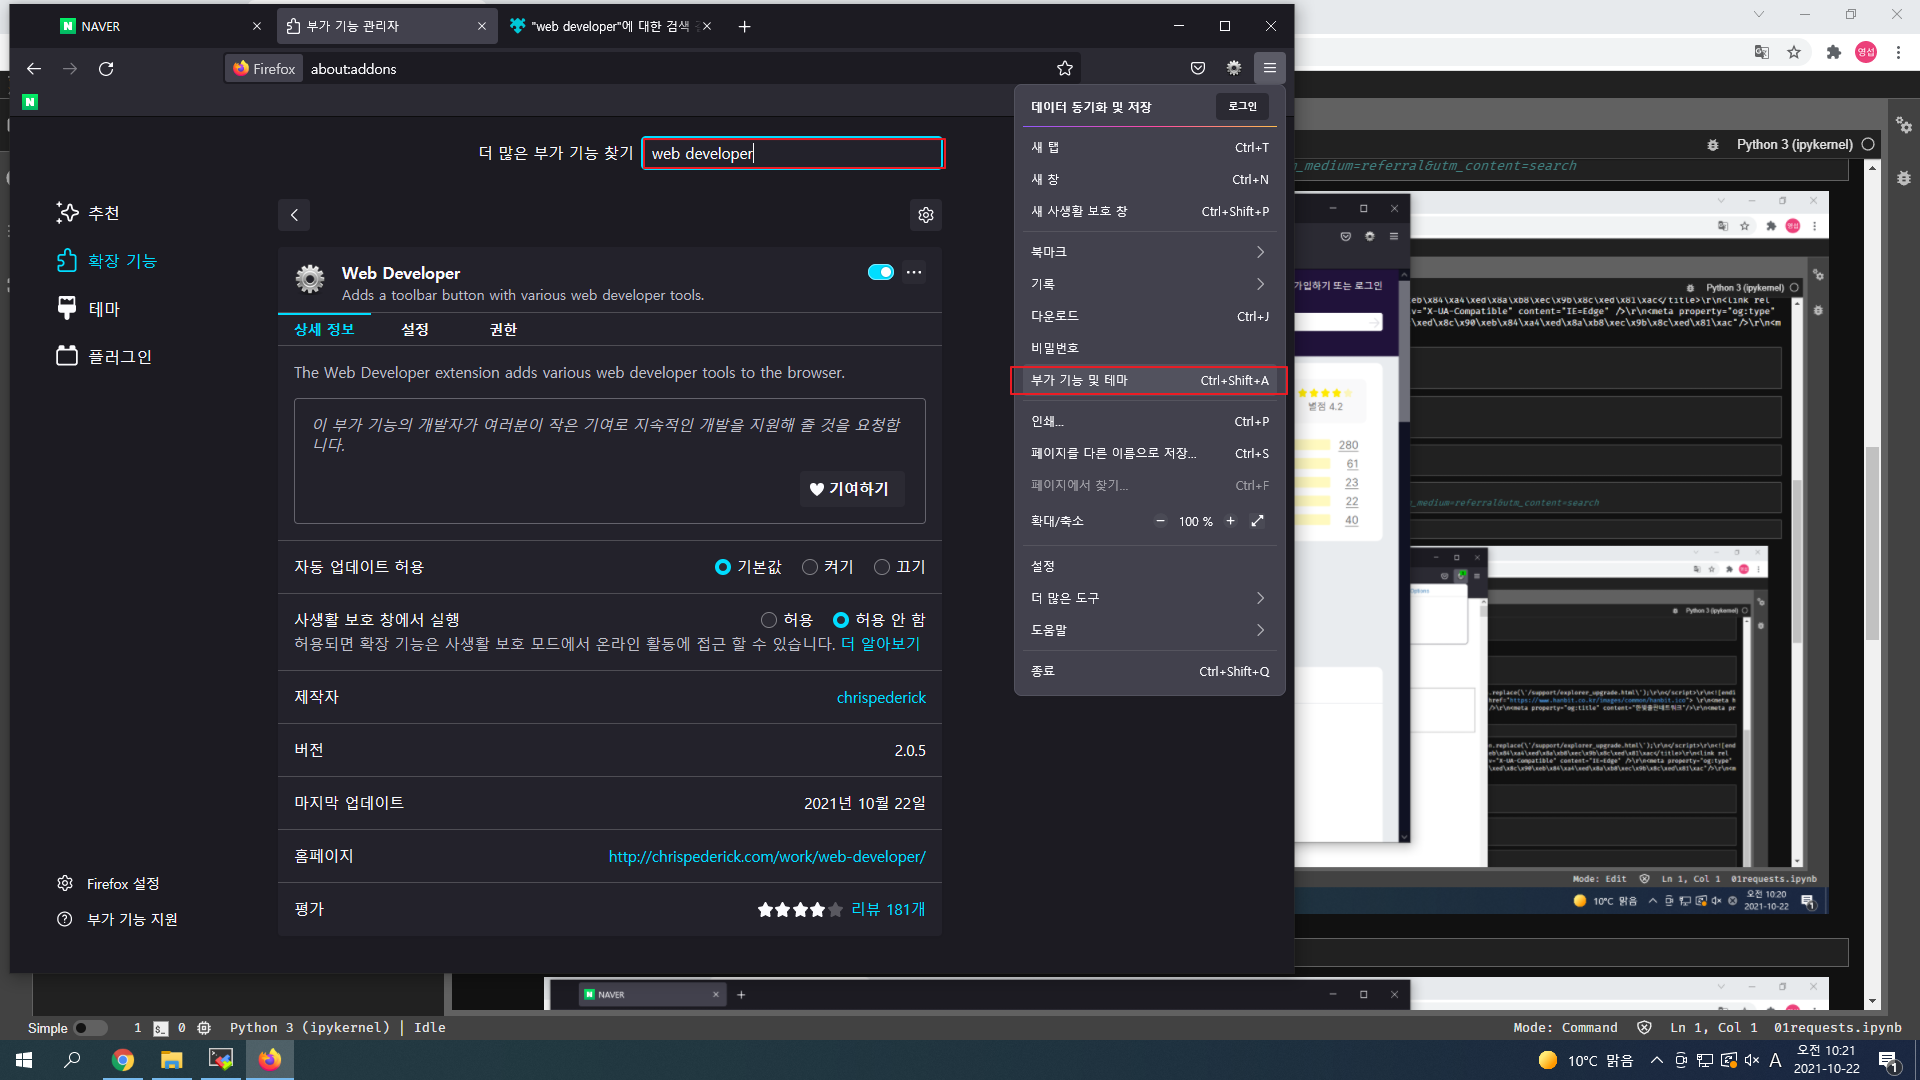

In [14]:
# 추출한 제목을 저장하기 위해 리스트 선언
titles = []
authors = []
prices = []
thumbs = []

In [16]:
# 모든 p 태그들 중에서 클래스명이 book_tit인 p태그(들)
# 찾으후 하위 태그가 a인 요소들을 선택한후 
# 텍스트 요소를 추출함
for title in root.cssselect('p.book_tit a'):
    titles.append(title.text_content())
    # print(title.text_content())

In [17]:
for author in root.cssselect('p.book_writer'):
    # print(author.text_content())
    authors.append(author.text_content())

In [18]:
# 도서 가격 추출시 ',' 와 '원'은 제거한후 리스트에 저장 해야함
for price in root.cssselect('span.price'):
    # print(price.text_content())
    prices.append(price.text_content())

In [19]:
for thumb in root.cssselect('img.thumb'):
    # print(thumb.get('src'))
    thumbs.append(thumb.get('src'))

In [20]:
# 추출한 데이터들을 csv 형식 재작성
# 혼자 공부하는 파이썬, 윤인성, 16200, 이미지경로 
data = ''
for i in range(len(titles)):
    print(f'"{titles[i]}","{authors[i]}", {prices[i]}, {thumbs[i]}\n')
    data += f'"{titles[i]}","{authors[i]}", {prices[i]}, {thumbs[i]}\n'

"혼자 공부하는 머신러닝+딥러닝","박해선 ", 23,400원, /data/books/B2002963743_m.jpg

"회사에서 바로 통하는 실무 엑셀+파워포인트+워드&한글","전미진 , 이화진 , 신면철 ", 19,800원, /data/books/B8635373198_m.jpg

"IT CookBook, 데이터베이스 개론(2판)","김연희 ", 27,000원, /data/books/B8582604063_m.jpg

"IT CookBook, 시스템 프로그래밍: 리눅스&유닉스","이종원 ", 28,000원, /data/books/B3943456030_m.jpg

"눈 떠보니 선진국","박태웅 ", 14,850원, /data/books/B7123382765_m.jpg

"미라클 모닝","할 엘로드 ", 10,800원, /data/books/B8196132630_m.jpg

"심리 읽어드립니다","김경일 , 사피엔스 스튜디오 ", 15,750원, /data/books/B8953951220_m.jpg

"나도 손글씨 바르게 쓰면 소원이 없겠네","유한빈(펜크래프트) ", 10,800원, /data/books/B2272461464_m.jpg

"리얼 국내여행 [2021~2022년 최신판]","배나영 ", 16,200원, /data/books/B3530910256_m.jpg

"재미있고 빠른 첫 한글 쓰기 1권 : 모음∙자음∙쉬운 낱말","한빛학습연구회 ", 5,850원, /data/books/B7448405310_m.jpg

"재미있고 빠른 첫 한글 쓰기 2권 : 가나다 글자","한빛학습연구회 ", 5,850원, /data/books/B9960200234_m.jpg

"C#과 데이터베이스로 누구나 쉽게 주식 자동매매 시스템 만들기","이경오 ", 14,400원, /data/ebook/E1054933296_m.jpg

"유니티 개발자를 위한 C#으로 온라인 게임 서버 만들기","이석현 ", 9,900원, /data/ebook/E6015792502_m.jpg

"혼자 공

IndexError: list index out of range

In [21]:
data

'"혼자 공부하는 머신러닝+딥러닝","박해선 ", 23,400원, /data/books/B2002963743_m.jpg\n"회사에서 바로 통하는 실무 엑셀+파워포인트+워드&한글","전미진 , 이화진 , 신면철 ", 19,800원, /data/books/B8635373198_m.jpg\n"IT CookBook, 데이터베이스 개론(2판)","김연희 ", 27,000원, /data/books/B8582604063_m.jpg\n"IT CookBook, 시스템 프로그래밍: 리눅스&유닉스","이종원 ", 28,000원, /data/books/B3943456030_m.jpg\n"눈 떠보니 선진국","박태웅 ", 14,850원, /data/books/B7123382765_m.jpg\n"미라클 모닝","할 엘로드 ", 10,800원, /data/books/B8196132630_m.jpg\n"심리 읽어드립니다","김경일 , 사피엔스 스튜디오 ", 15,750원, /data/books/B8953951220_m.jpg\n"나도 손글씨 바르게 쓰면 소원이 없겠네","유한빈(펜크래프트) ", 10,800원, /data/books/B2272461464_m.jpg\n"리얼 국내여행 [2021~2022년 최신판]","배나영 ", 16,200원, /data/books/B3530910256_m.jpg\n"재미있고 빠른 첫 한글 쓰기 1권 : 모음∙자음∙쉬운 낱말","한빛학습연구회 ", 5,850원, /data/books/B7448405310_m.jpg\n"재미있고 빠른 첫 한글 쓰기 2권 : 가나다 글자","한빛학습연구회 ", 5,850원, /data/books/B9960200234_m.jpg\n"C#과 데이터베이스로 누구나 쉽게 주식 자동매매 시스템 만들기","이경오 ", 14,400원, /data/ebook/E1054933296_m.jpg\n"유니티 개발자를 위한 C#으로 온라인 게임 서버 만들기","이석현 ", 9,900원, /data/ebook/E6015792502_m.jpg\n"혼자 

In [22]:
# 추출한 데이터들을 csv 파일로 저장
hdr = 'title,author,price,thumb\n'
with open('books.csv', 'w') as f:
    f.write(hdr)
    f.write(data)

In [23]:
# 한빛미디어 홈페이지의 새로나온책 페이지의 
# 도서정보(이미지,도서명,저자,가격)를 수집하세요 
# 단, 1~3페이지까지의 도서를 대상으로 추출

In [24]:
# 한빛미디어 홈페이지의 전체도서목록 페이지의 
# 도서정보(브랜드,도서명,저자,발행일,가격)를 수집하세요 

In [25]:
url = 'https://www.hanbit.co.kr/store/books/full_book_list.html'

In [26]:
res = requests.get(url)
html = res.text
root = lxml.html.fromstring(html)

In [27]:
brands = []
titles = []
writers = []
pubdates = []
prices = []

In [28]:
# css선택자가 요소마다 다름
# 이런 경우 이름을 요소로 선택하는 것보다는 
# 요소의 위치를 선택자로 사용해서 요소를 선택하는 것이 좋음 
# for brand in root.cssselect('td.brd_m'): 
# 모든 td태그들 중에서 첫번째 td태그(들)를 선택함 
for brand in root.cssselect('table.tbl_type_list td:first_child'):
    print(brand.text_content())
    #brands.append(brand.get('src'))

한빛미디어
한빛미디어
한빛미디어
한빛미디어
한빛미디어
한빛아카데미
한빛미디어
한빛미디어
한빛미디어
한빛비즈
한빛아카데미
한빛에듀
한빛에듀
한빛라이프
한빛비즈
한빛미디어
한빛미디어
한빛미디어
한빛미디어
한빛미디어
한빛라이프
한빛비즈
한빛아카데미
한빛미디어
한빛비즈
한빛미디어
한빛아카데미
한빛미디어
한빛미디어
한빛비즈
한빛아카데미
한빛비즈
한빛아카데미
한빛에듀
한빛에듀
한빛에듀
한빛미디어
한빛미디어
한빛라이프
한빛비즈
한빛아카데미
한빛아카데미
한빛아카데미
한빛미디어
한빛미디어
한빛아카데미
한빛라이프
한빛미디어
한빛아카데미
한빛미디어


In [29]:
for title in root.cssselect('td.left a'):
    print(title.text_content())
    #.append(thumb.get('src'))

구글 BERT의 정석
머신러닝 디자인 패턴
소프트웨어 아키텍처 101
혼자 공부하는 SQL
한 권으로 다지는 머신러닝&딥러닝 with 파이썬
IT CookBook, 시스템 프로그래밍: 리눅스&유닉스
살아 움직이는 머신러닝 파이프라인 설계
시험장에 몰래 가져갈  이경오의 SQL+SQLD 비밀노트
그로킹 심층 강화학습
심리 읽어드립니다
한번에 적용하는 분석
1000개 숨은그림찾기 바다 동물
1000개 숨은그림찾기 아이스크림
탐험! 숲체험 생물 도감
깍두기 가계부 2022
제대로 배우는 수학적 최적화
미국 주식으로 시작하는 슬기로운 퀀트투자
1년에 5,000만 원 버는 수익 확장 노하우 네이버 블로그로 돈 벌기
디자인 1등 유튜버 존코바의 클릭을 유도하는 유튜브 디자인 with 포토샵
핸즈온 해킹
정리 잘하는 사람은 이렇게 합니다
두 발로 선 경제
인공지능 논리 입문
머신러닝 파워드 애플리케이션
유튜브 마케팅 인사이트
웹 브라우저 속 머신러닝 TensorFlow.js
IT CookBook, 처음 만나는 전기기기(2판)
모바일 UX/UI 디자인 강의 with Adobe XD
처음 배우는 플라스크 웹 프로그래밍
인문학 거저보기 : 서양철학 편
IT CookBook, 현대 센서공학(5판)
방구석 심리학 실험실
IT CookBook, 모바일 웹 서비스 구현을 위한 JSP 웹 프로그래밍
혼자서도 척척 접는 종이접기
혼자서도 척척 접는 종이접기 플러스
혼자서도 척척 접는 종이접기 2권 세트
스파크를 이용한 자연어 처리
클라우드 네이티브를 위한 데이터 센터 네트워크 구축
어른을 위한 두뇌 놀이 책
감으로만 일하던 김 팀장은 어떻게 데이터 좀 아는 팀장이 되었나
쉽게 배우고 익히는 회계원리[객관식/학습문제 해답](4판)
미래조직을 위한 조직설계의 이해(4판)
쉽게 배우고 익히는 회계원리(4판)
fastai와 파이토치가 만나 꽃피운 딥러닝
스케치업 & V-Ray 트레이닝 북(개정판)
IT CookBook, 짧고 굵게 배우는 JSP 웹 프로그래밍과 스프링 프레임워크
생각과 말로 글을

In [30]:
# 동일한 css 선택자가 여러 요소에 사용됨
# for writer in root.cssselect('td.left'):
for writer in root.cssselect('td:nth-child(3)'):
    print(writer.text_content())
    #.append(thumb.get('src'))

수다르산 라비찬디란   
발리아파 락슈마난 외 2명  
마크 리처즈 외 1명  
우재남   
알베르토 아르타산체스 외 1명  
이종원   
하네스 하프케 외 1명  
이경오   
미겔 모랄레스   
김경일 외 1명  
히든그레이스 데이터분석팀   
이한이   
김확실   
이치니치 잇슈   
쓰담여사   
우메타니 슌지   
김용환 외 1명  
김동석   
존코바(이요한)   
매슈 히키 외 1명  
고메다 마리나   
이용우   
이은정   
에마뉘엘 아메장   
서양수   
카이 사사키   
최은혁 외 1명  
김영삼   
윤정현   
지하늘   
Jacob Fraden   
마이클 A. 브릿   
김현규 외 1명  
신구 후미아키   
신구 후미아키   
신구 후미아키   
앨릭스 토머스   
디네시 G. 더트   
개러스 무어 박사   
황보현우 외 1명  
정용기 외 4명  
현선해 외 2명  
정용기 외 4명  
제러미 하워드 외 1명  
강석창   
황희정   
강근영   
오가와 유타로   
Abraham Silberschatz 외 2명  
마이클 롭   


In [31]:
# 요소에 css 선택자가 없음
for pubdate in root.cssselect('td:nth-child(4)'):
    print(pubdate.text_content())
    #.append(thumb.get('src'))

2021-11-03
2021-11-01
2021-11-01
2021-11-01
2021-10-21
2021-10-15
2021-10-11
2021-10-10
2021-10-10
2021-10-08
2021-10-08
2021-10-08
2021-10-08
2021-10-06
2021-10-01
2021-09-30
2021-09-30
2021-09-28
2021-09-27
2021-09-27
2021-09-17
2021-09-10
2021-09-10
2021-09-06
2021-09-03
2021-09-01
2021-08-31
2021-08-30
2021-08-30
2021-08-30
2021-08-27
2021-08-25
2021-08-23
2021-08-23
2021-08-23
2021-08-23
2021-08-20
2021-08-20
2021-08-20
2021-08-16
2021-08-13
2021-08-13
2021-08-13
2021-08-10
2021-08-09
2021-08-09
2021-08-07
2021-08-05
2021-08-05
2021-08-01


In [32]:
# 코드가 없는 경우 하위 설정 할때 + 로 해도됨 ( 호연씨 코드 ) 
for pubdate in root.cssselect('td.left+td.left+td'):
    pubdates.append(pubdate.text_content())
print(pubdates)

['2021-11-03', '2021-11-01', '2021-11-01', '2021-11-01', '2021-10-21', '2021-10-15', '2021-10-11', '2021-10-10', '2021-10-10', '2021-10-08', '2021-10-08', '2021-10-08', '2021-10-08', '2021-10-06', '2021-10-01', '2021-09-30', '2021-09-30', '2021-09-28', '2021-09-27', '2021-09-27', '2021-09-17', '2021-09-10', '2021-09-10', '2021-09-06', '2021-09-03', '2021-09-01', '2021-08-31', '2021-08-30', '2021-08-30', '2021-08-30', '2021-08-27', '2021-08-25', '2021-08-23', '2021-08-23', '2021-08-23', '2021-08-23', '2021-08-20', '2021-08-20', '2021-08-20', '2021-08-16', '2021-08-13', '2021-08-13', '2021-08-13', '2021-08-10', '2021-08-09', '2021-08-09', '2021-08-07', '2021-08-05', '2021-08-05', '2021-08-01']


In [33]:
# for price in root.cssselect('td.right'):
for price in root.cssselect('td:last-child'):
    print(price.text_content())
    #.append(thumb.get('src'))


                
                
                {{ bookSummary.author }} 지음
                {{ bookSummary.publishingCompany }} | {{ bookSummary.date }}
                
                
                {{ bookSummary.bookType }}
                
              
34,000원
38,000원
32,000원
24,000원
40,000원
28,000원
32,000원
32,000원
35,000원
17,500원
24,000원
8,000원
8,000원
13,000원
14,800원
38,000원
32,000원
16,000원
19,800원
45,000원
15,000원
23,000원
22,000원
27,000원
16,500원
25,000원
24,000원
26,000원
19,800원
18,500원
35,000원
18,000원
30,000원
9,800원
9,800원
15,000원
34,000원
36,000원
9,900원
17,800원
7,000원
22,000원
30,000원
44,000원
28,000원
27,000원
15,800원
40,000원
45,000원
22,000원


In [34]:
# 네이버 검색예제
# search.naver.com/search.naver?query=검색어
# 네이버에 검색어를 입력하고 검색결과에서 데이터 추출
# 질의문자열 querystring 을 이용해서 검색하고 
# 그 결과에서 필요한 데이터를 추출함

In [35]:
# 특정 사이트는 스크래핑이나 크롤링을 막기 위한 방편으로
# 사이트에 접속하는 사용자의 useragent를 확인함
# UA없이 사이트 접속을 시도하면 접속권한 거부의 의미로
# 403 응답코드와 함께 접속을 금지하기도 함 

In [36]:
query = 'html5' #검색어
url = 'https://search.naver.com/search.naver'

headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/94.0.4606.81 Safari/537.36'}
params = {'query' : query}

res = requests.get(url, headers=headers, params=params)
html = res.text
html[:500]
root = lxml.html.fromstring(html)

In [37]:
# 블로그, 웹사이트, 네이버책, 포스트 등의
# 제목과 링크 추출

In [38]:
titles = []
links = []

In [39]:
for web in root.cssselect('panel-list a.api_txt_lines'):
    print(web.text_content())
    print(web.get('href'))

Html5 구조 | 기초부터 디자인까지 셀프코딩#2
https://blog.naver.com/call_1994/222253172378
HTML5 + CSS + JS 스터디 시작
https://blog.naver.com/sorang226/222278039447
[HTML] 211011 HTML5
https://blog.naver.com/blogubo/222540152084
[HTML5] 간단한 상단메뉴 만드는 방법
https://blog.naver.com/dltmdxorcj/222549361201
앱 플랫폼에서 사용자가 떠나지 못하는 이유 'HTML5 게임'
https://post.naver.com/viewer/postView.naver?volumeNo=32437712&memberNo=15460786&vType=VERTICAL
웹 제작의 뼈대! HTML5 한 번에 끝내기_경기도 지식 GSEEK
https://blog.naver.com/gseekcampus/222025837061
HTML5 웹 표준 단말 시스템 “W-ebTop(웹탑)” 이젠 선택이 아닌 필수
https://blog.naver.com/inswavemk/222528821695


In [40]:
for brain in root.cssselect('a.question_text'):
    print(brain.text_content())
    print(brain.get('href'))

CSS,HTML 과 CSS3,HTML5의 차이점이 뭔가요? (간단히 요약해주세요!)
https://kin.naver.com/qna/detail.naver?d1id=1&dirId=1040205&docId=379944783&qb=aHRtbDU=&enc=utf8&section=kin.ext&rank=1&search_sort=0&spq=0
html5 css3 인강 추천 좀 html5css3공부하려구요 웹페이지 만들어보려는데 책은 어려워서요 단기간 준비할 수 있는 곳으로 추천좀요
https://kin.naver.com/qna/detail.naver?d1id=1&dirId=10501&docId=384782269&qb=aHRtbDU=&enc=utf8&section=kin.ext&rank=2&search_sort=0&spq=0
HTML5 table 관련 질문 HTML5로 다음과 같이 표를 넣고 싶은데 어떻게 하면 될까요?
https://kin.naver.com/qna/detail.naver?d1id=1&dirId=1040205&docId=372443019&qb=aHRtbDU=&enc=utf8&section=kin.ext&rank=3&search_sort=0&spq=0


In [41]:
for wiki in root.cssselect('a.link_tit'):
    print(wiki.text_content())
    print(wiki.get('href'))

 HTML5 - 나무위키 
https://namu.wiki/w/HTML5
 Your browser - HTML5test - How well does your browser support HTML5? 
https://html5test.com/
 W3C HTML 
https://www.w3.org/html/
 Web Hypertext Application Technology Working Group (WHATWG) 
https://whatwg.org/


In [42]:
for book in root.cssselect('a.title_area'):
    print(book.text_content())
    print(book.get('href'))

In [43]:
# jtbc 뉴스 사이트에서
# 사진npic, 제목title, 기사미리보기preview, 범주ntype 등을
# 크롤링해서 jtbcnews 테이블에 저장
# 단, 뉴스기사는 2020-10-22 일자를 대상으로 한다 

In [44]:
url = 'https://news.jtbc.joins.com/section/list.aspx'
params = {'pdate':'20201022'}

In [45]:
res = requests.get(url, headers=headers, params=params)

In [46]:
html = res.text
root = lxml.html.fromstring(html)

In [47]:
res.text[:500]

'\n<!DOCTYPE html> \n    <!--[if IE 7]><html lang="ko" class="ie7"><![endif]--> \n    <!--[if IE 8]><html lang="ko" class="ie8"><![endif]--> \n    <!--[if IE 9]><html lang="ko" class="ie9"><![endif]--> \n    <!--[if gt IE 9]><!--> <html lang="ko"> <!--<![endif]--> \n    <head id="Head1"><script type="text/javascript">document.domain="joins.com";</script><meta http-equiv="Content-Type" content="text/html; charset=UTF-8" /><meta http-equiv="cache-control" content="no-cache" />\r\n    <Meta name="title" con'

In [48]:
npics = []
titles = []
previews = []
ntypes = []

In [49]:
for npic in root.cssselect('dd.photo a img'):
    print(npic.get('src'))
    npics.append(npic.get('src'))

https://photo.jtbc.joins.com/news/2020/10/22/202010222242142756_LC.jpg.tn350.jpg
https://photo.jtbc.joins.com/news/2020/10/22/202010222217403478_LC.jpg.tn350.jpg
https://photo.jtbc.joins.com/news/2020/10/22/202010222102401754_LC.jpg.tn350.jpg
https://photo.jtbc.joins.com/news/2020/10/22/202010222120070095_LC.jpg.tn350.jpg
https://photo.jtbc.joins.com/news/2020/10/22/202010220930056459.jpg.tn350.jpg
https://photo.jtbc.joins.com/news/2020/10/22/202010220927336004.jpg.tn350.jpg
https://photo.jtbc.joins.com/news/2020/10/22/202010222114196734_LC.jpg.tn350.jpg
https://photo.jtbc.joins.com/news/2020/10/22/202010222113384343_LC.jpg.tn350.jpg
https://photo.jtbc.joins.com/news/2020/10/22/202010222108560614_LC.jpg.tn350.jpg
https://photo.jtbc.joins.com/news/2020/10/26/202010261603123770_LC.jpg.tn350.jpg
https://photo.jtbc.joins.com/news/2020/10/22/202010222110571415_LC.jpg.tn350.jpg
https://photo.jtbc.joins.com/news/2020/10/22/202010222107187996_LC.jpg.tn350.jpg
https://photo.jtbc.joins.com/news/

In [50]:
for title in root.cssselect('dt.title_cr a'):
    print(title.text_content())
    titles.append(title.text_content())

건설 폐기물 파묻은 땅에서 벼농사…'브랜드 쌀'로 판매
[단독] '술접대' 지목 유흥업소…"김봉현과 검사들 왔었다"
[원보가중계] 국감 중에 이러시면…강훈식, 또 게임하다 딱 걸려
[날씨박사] 먼지에 한파까지…23일 아침은 더 춥다
둥근 공의 '심술'…챔피언스리그 흔드는 '자책골'
김태균 '눈물의 은퇴'…"20년간 우승 못 해서 아쉬워"
[팩트체크] 월성 원전 방사성물질이 후쿠시마 130배?
'채용비리 혐의' LG전자 전·현직 임직원 12명 검찰 송치
구글, 게임업체에 '구글 규제법' 반대 종용 의혹
"택배노동자 사망, 업무와 무관" 쿠팡 측 주장 따져보니…
택배노동자 또 숨져…"한 번 출근하면 2,3일씩 근무"
총선 토론회서 '세월호 유가족에 막말' 차명진 기소
"나경원 아들, 엄마 찬스"…서울대 국감서 도마 올라
[밀착카메라] 13살도 전동킥보드 허용…안전은 누가?
윤석열, 문 대통령 메시지 공개…청와대 "입장 없다"


In [51]:
for preview in root.cssselect('dd.read_cr a'):
    print(preview.text_content())
    previews.append(preview.text_content())

 [앵커]경기도 일부 지역에서 '건설 폐기물'이 섞인 논에서 자란 벼를 브랜드 쌀로 포장해 팔고 있습니다. 저희 취재진이 다섯 달 동안 현장을 추적했는데요. 업체들이 처리 비용을 아끼려고 논에다 폐기물을 퍼부었...
 [앵커]오늘(22일) 국정감사에선 김봉현 전 회장이 주장한 '검사 술접대 의혹'도 쟁점이 됐습니다. 아직 그 진위는 확인되지 않고 있는데, 일단 당사자 측은 강하게 반박하고 있습니다. 저희 법조팀이 그 유흥업소를...
 좋은 밤, 좋은 뉴스 < 원보가중계 > 시작합니다.첫 번째 소식입니다.앞서 대검찰청 국정감사 리포트에서 미처 다루지 못한 소식이 있어서 준비했습니다.열린민주당 김진애 의원, 윤석열 검찰총장 상대로 부인의 재...
 [앵커]날씨박사 시간입니다. 기상학 박사, 김세현 기상전문기자가 나와 있습니다.김세현 기자, 오늘(22일) 황사 때문에 전국 곳곳에 미세먼지 주의보가 내려졌고, 지금도 내려진 곳이 있다고 하는데, 오늘 밤엔 한...
[앵커]축구에서 자책골은 골문을 지키는 선수라면 어떻게든 피하고 싶은 순간이죠. 하지만 의도치 않은 순간, 야속한 장면이 튀어나오곤 합니다. 엉뚱한 곳에 맞아서 골라인을 넘고, 또 막아냈다 싶다가도 골이 되는...
[김태균/한화이글스 : 한화이글스는 저의 자존심이었고 자부심이었습니다.][앵커]20년 선수 생활을 내려놓으면서 한화의 4번 타자 김태균은 끝내 울어버렸습니다. 홈런만 대접받던 우리 야구에 출루의 가치를 알려준...
 [앵커]일본 정부가 '방사능 오염수'를 바다에 흘려보낼 방침을 이달 안에 확정할 것으로 보입니다. 일본 정치권에서는 "한국의 원전에서 나오는 방사성 물질이 후쿠시마의 130배다"라는 주장이 나왔습니다. 저희 팩...
 경찰이 LG전자 전·현직 임직원 12명을 채용비리 혐의로 검찰에 넘겼습니다.지난 2013년에서 2015년 사이, LG전자 한국영업본부 공개채용 과정에서 채용 청탁이 들어온 지원자들을 부당하게 합격시킨 혐의입...
 [앵커]최근 미국 정부가 구글을 상대로 반독점법 위반 혐

In [52]:
for ntype in root.cssselect('span.location'):
    ntype = ntype.text_content().replace('\t', '')
    ntype = ntype.replace('\r\n', '')
    ntype = ntype.replace(' ', '')
    ntype = ntype.replace('[JTBC>', '')
    ntype = ntype.replace(']', '')
    ntypes.append(ntype)

In [53]:
ntypes

['사회',
 '사회',
 '정치',
 '날씨',
 '스포츠',
 '스포츠',
 '사회',
 '사회',
 '정치',
 '사회',
 '사회',
 '사회',
 '정치',
 '사회',
 '정치']

In [54]:
#re 사용해서 하는 내용물 전처리 
import re 
for ntype in root.cssselect('span.location'):
    ntype = re.sub('\t|\r\n|','',ntype.text_content())
    ntype = re.sub('\[JTBC>|\]', '', ntype)
    ntypes.append(ntype)

In [55]:
# 추출한 데이터들을 csv 형식 재작성 
data = ''
for i in range(len(titles)):
    rows = f'{titles[i]}{previews[i]}{ntypes[i]}{npics[i]}\n'

In [56]:
# pip install pymysql

In [58]:
import pymysql

In [69]:
url = 'bigdata.cjsnjphl4oxy.ap-northeast-2.rds.amazonaws.com'
uid = 'admin'
pwd = 'bigdata2020'
db = 'bigdata'
charset = 'utf8'
sql = 'insert into jtbcnews (title,preview,ntype,npic) values (%s,%s,%s,%s)'

In [70]:
conn = pymysql.connect(host=url, user=uid, password=pwd, db=db, charset=charset)
cursor = conn.cursor()

OperationalError: (2003, "Can't connect to MySQL server on '192.168.234.132' (timed out)")

In [66]:
for i in range(len(titles)):
    params = (titles[i],previews[i],ntypes[i],npics[i])
    cursor.execute(sql, params)
    conn.commit()

cursor.close()
conn.close()

ProgrammingError: (1146, "Table 'bigdata.jtbcnews' doesn't exist")

In [440]:
# daum.net -> 더보기 -> 영화
# 영화제목, 평점, 예매율을 추출하세요
# 영화사이트 같은경우 동적 사이트 ( 실시간으로 변하는 사이트 ) 이므로 크롤링이 불가능함

In [417]:
url = 'https://movie.daum.net/main'

In [425]:
res = requests.get(url, headers=headers)

In [419]:
html = res.text 
root = lxml.html.fromstring(html)

In [427]:
titles = []
ratings = []
reservs = []

In [434]:
for title in root.cssselect('strong a.link_txt'):
    print(title.text_content())

In [438]:
for rating in root.cssselect('span.text_append span:first-child'):
    print(rating.text_content())

In [439]:
for reserv in root.cssselect('span.text_append span:last-child'):
    print(resrv.text_content())